In [ ]:
%pip install scikit-learn numpy pandas matplotlib tqdm

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

X, y = load_breast_cancer(return_X_y=True)
y[y == 0] = -1

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Classes: {np.unique(y)}")

X shape: (569, 30)
y shape: (569,)
Classes: [-1  1]


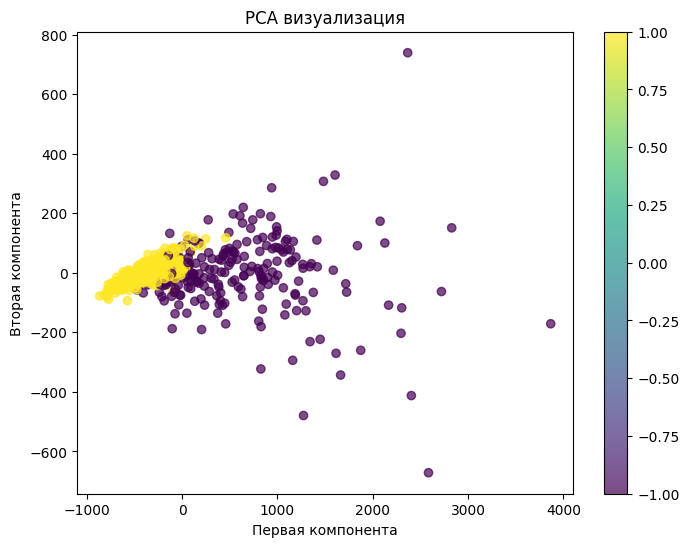

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('PCA визуализация')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()


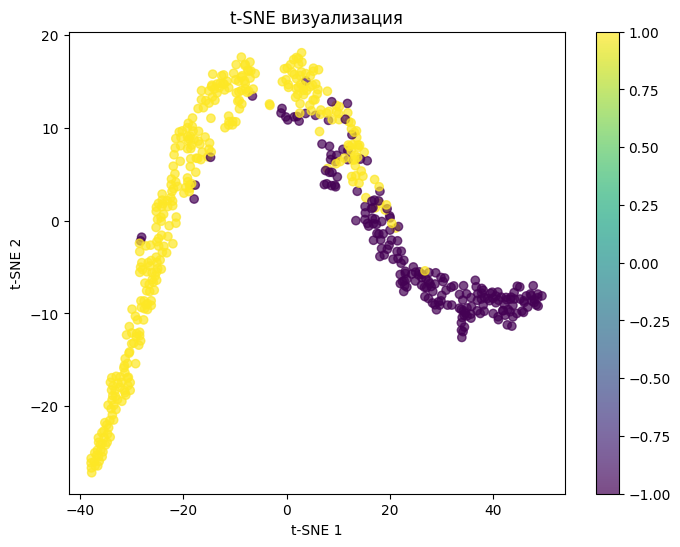

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE визуализация')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = StandardScaler().fit_transform(X)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
sklearn_svm = SVC(kernel='rbf')
sklearn_svm.fit(X_train, y_train)

y_pred_sklearn = sklearn_svm.predict(X_test)
print(f"Sklearn SVM Accuracy: {accuracy_score(y_test, y_pred_sklearn):.3f}")
print(f"Sklearn SVM Support vectors: {len(sklearn_svm.support_vectors_)}")
print("Sklearn SVM Confusion matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))


Sklearn SVM Accuracy: 0.982
Sklearn SVM Support vectors: 97
Sklearn SVM Confusion matrix:
[[41  1]
 [ 1 71]]


In [6]:
import numpy as np
from source.svm_classifier import SVMClassifier, RBFKernel

svm = SVMClassifier(kernel=RBFKernel(gamma=0.05), C=1.0)
svm.fit(X_train, y_train)

print(f"Support vectors: {len(svm.support_vectors)}")

y_pred = svm.predict(X_test)
print(f"Custom SVM Accuracy: {round(accuracy_score(y_test, y_pred), 3)}")
print("Custom SVM Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Support vectors: 122
Custom SVM Accuracy: 0.974
Custom SVM Confusion matrix:
[[41  1]
 [ 2 70]]


/var/folders/2k/j64djv5131g0m2v23qm8g2lm0000gn/T/ipykernel_64665/1398734742.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


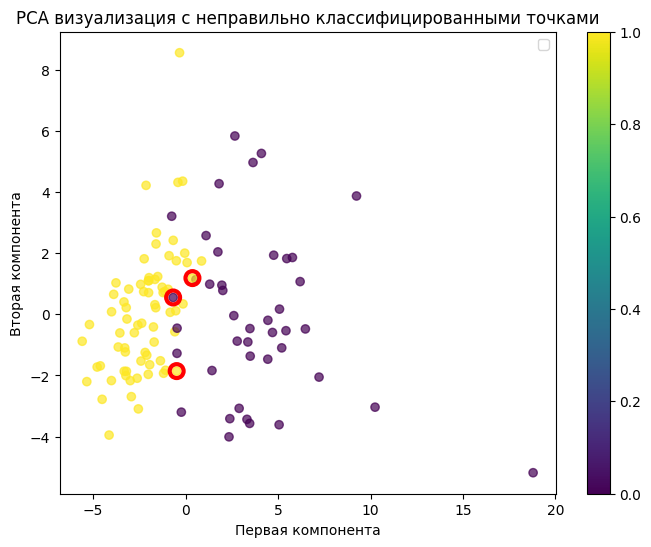

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)

misclassified = y_pred != y_test
if np.any(misclassified):
    plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], 
                facecolors='none', edgecolors='red', linewidth=3, s=100)
    plt.legend()

plt.colorbar()
plt.title('PCA визуализация с неправильно классифицированными точками')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()
